**Importing Necessary Libraries**

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
import plotly.express as px

In [147]:
import warnings
warnings.filterwarnings('ignore')

In [197]:
df = pd.read_csv('/content/housing.csv')

In [198]:
df.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY

**Exploratory Data Analysis**

In [150]:
print('Shape of dataset :', df.shape)
print('-'*25)
print(df.info())
print('-'*25)
print('Number of missing values in each column :')
print(df.isnull().sum())

Shape of dataset : (20640, 10)
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
-------------------------
Number of missing values in each column :
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms   

In [151]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

total_bedrooms have 207 null values and all other are non-null columns.

We can see 207 missing values in total_bedrooms column, which is only 1 percent of data in column, so we can fill it with mean value of column.

In [152]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace = True)

In [199]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Lets look at our data distribution using histograms.


In [200]:
df.hist(figsize=(15, 10), bins=100)
plt.show()

**Applying 'log' Transformation to the 'median_income' column.**

<Axes: xlabel='median_income', ylabel='Density'>

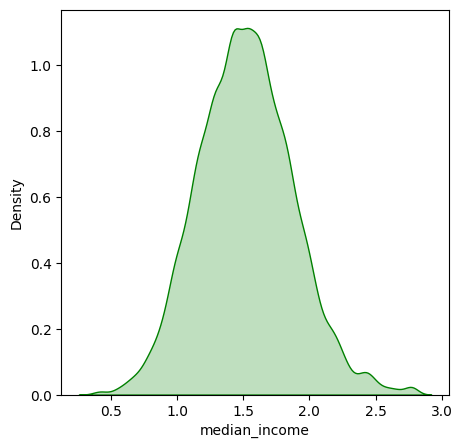

In [201]:
plt.figure(figsize=(5, 5))
sns.kdeplot(np.log1p(df['median_income']),fill = True,color = 'green')

In [202]:
df['median_income'] = np.log1p(df['median_income'])

In [205]:
sns.heatmap(df.corr(numeric_only = True),annot = True,cmap = 'viridis',cbar = True,linewidths=0.5)

<Axes: >

We observe that total_rooms,total_bedrooms,population and households are highly correlated. They show similay histplots, so we can assume that they show similar information. It would be better to combine those features into one feature.

Our target value median_house_value is highly correlated with median_income.

Latitude and Longitude are inversly correlated to each other.

**Feature Engineering**

Creating important features.

In [158]:
# It captures the number of beds avalible for each room.
df['bed_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [159]:
# It captures the number of total rooms avalible for each house hold.
df["rooms_per_house"] = df["total_rooms"] / df["households"]

In [160]:
# Create population per household ratio. It might capture the population density.
df['population_per_household'] = df['population'] / df['households']

In [161]:
df.corr(numeric_only = True)['median_house_value']

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049457
population                 -0.024650
households                  0.065843
median_income               0.669914
median_house_value          1.000000
bed_per_room               -0.233303
rooms_per_house             0.151948
population_per_household   -0.023737
Name: median_house_value, dtype: float64

In [162]:
df.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0       2.232720            452600.0        NEAR BAY   
1      2401.0      1138.0       2.230165            358500.0        NEAR BAY   

   bed_per_room  rooms_per_house  population_per_household  
0      0.146591         6.984127                  2.555556  
1      0.155797         6.238137                  2.109842

In [163]:
df.drop(columns = ['total_rooms','total_bedrooms','population','households'],inplace = True)

<Axes: >

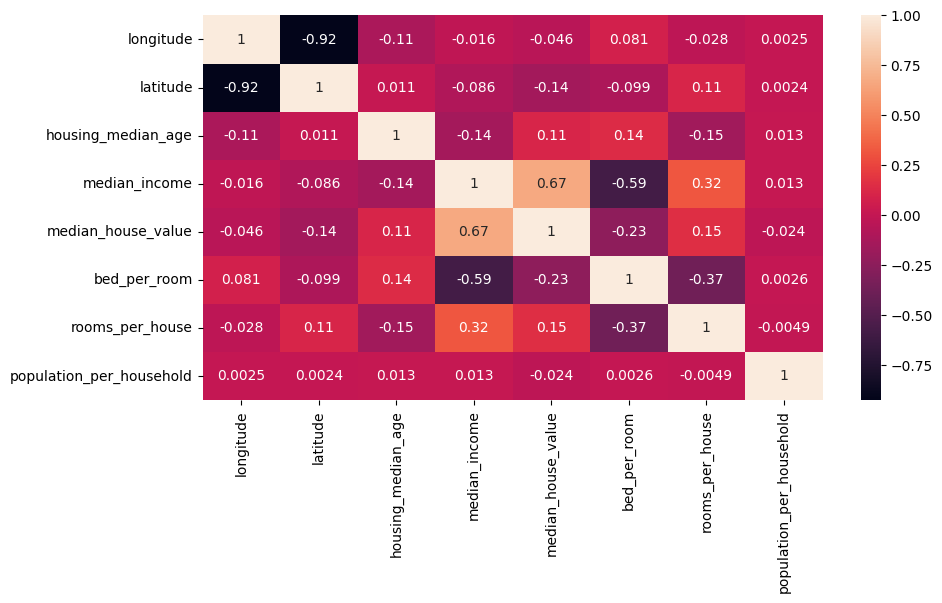

In [164]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only = True),annot = True)

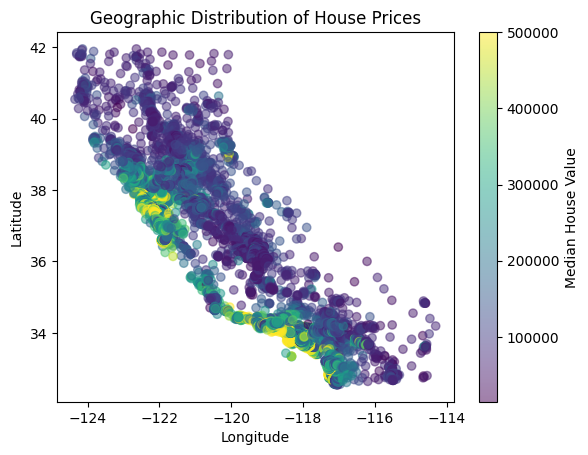

In [165]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `df` with longitude, latitude, and median_house_value
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of House Prices')
plt.show()


**Clustering the near by areas using KMeans**

In [166]:
from sklearn.cluster import KMeans

coords = df[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=20, random_state=0).fit(coords)
df['region'] = kmeans.labels_

In [167]:
df.corr(numeric_only = True)['median_house_value']

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
median_income               0.669914
median_house_value          1.000000
bed_per_room               -0.233303
rooms_per_house             0.151948
population_per_household   -0.023737
region                     -0.048612
Name: median_house_value, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

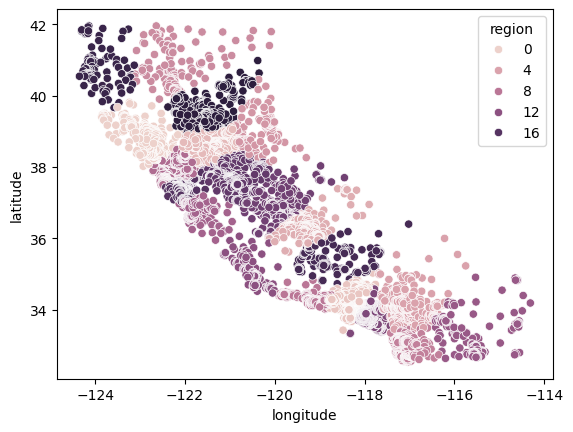

In [168]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='region')

In [169]:
df.drop(columns = ['longitude','latitude'],inplace = True)

In [170]:
df.head(2)

housing_median_age  median_income  median_house_value ocean_proximity  \
0                41.0       2.232720            452600.0        NEAR BAY   
1                21.0       2.230165            358500.0        NEAR BAY   

   bed_per_room  rooms_per_house  population_per_household  region  
0      0.146591         6.984127                  2.555556       9  
1      0.155797         6.238137                  2.109842       9

In [171]:
df.corr(numeric_only = True)['median_house_value']

housing_median_age          0.105623
median_income               0.669914
median_house_value          1.000000
bed_per_room               -0.233303
rooms_per_house             0.151948
population_per_household   -0.023737
region                     -0.048612
Name: median_house_value, dtype: float64

<Axes: >

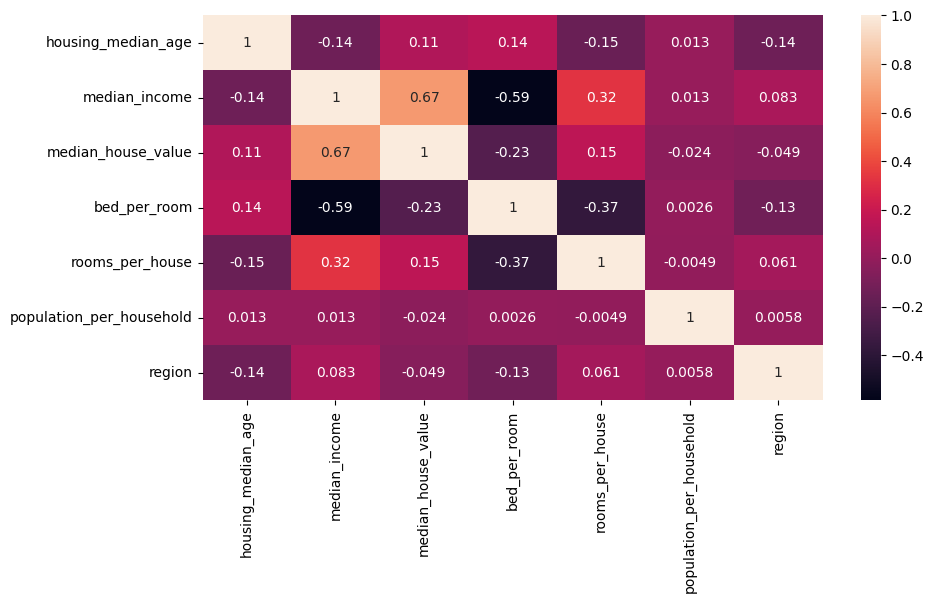

In [172]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only = True),annot = True)

In [173]:
df.head(2)

housing_median_age  median_income  median_house_value ocean_proximity  \
0                41.0       2.232720            452600.0        NEAR BAY   
1                21.0       2.230165            358500.0        NEAR BAY   

   bed_per_room  rooms_per_house  population_per_household  region  
0      0.146591         6.984127                  2.555556       9  
1      0.155797         6.238137                  2.109842       9

In [174]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [175]:
# Removing ocean_proximity = ISLAND because of its very low frequency it introduces noise into the prediction model.
df = df[df['ocean_proximity']!= 'ISLAND']

One-hot encoding the ocean_proximity column

In [176]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

In [177]:
dummies = pd.get_dummies(df['ocean_proximity'],drop_first = True,dtype = int)

# Drop the original 'ocean_proximity' column
df = df.drop(columns='ocean_proximity')

# Join the dummy variables to the DataFrame
df_final = df.join(dummies)

In [178]:
df_final

housing_median_age  median_income  median_house_value  bed_per_room  \
0                    41.0       2.232720            452600.0      0.146591   
1                    21.0       2.230165            358500.0      0.155797   
2                    52.0       2.111110            352100.0      0.129516   
3                    52.0       1.893579            341300.0      0.184458   
4                    52.0       1.578195            342200.0      0.172096   
...                   ...            ...                 ...           ...   
20635                25.0       0.940124             78100.0      0.224625   
20636                18.0       1.268861             77100.0      0.215208   
20637                17.0       0.993252             92300.0      0.215173   
20638                18.0       1.053336             84700.0      0.219892   
20639                16.0       1.220417             89400.0      0.221185   

       rooms_per_house  population_per_household  region  INLAND  NEAR BAY  \
0             6.984127                  2.555556       9       0         1   
1             6.238137                  2.109842       9       0         1   
2             8.288136                  2.802260       9       0         1   
3             5.817352                  2.547945       9       0         1   
4             6.281853                  2.181467       9       0         1   
...                ...                       ...     ...     ...       ...   
20635         5.045455                  2.560606      19       1         0   
20636         6.114035                  3.122807      19       1         0   
20637         5.205543                  2.325635      19       1         0   
20638         5.329513                  2.123209      19       1         0   
20639         5.254717                  2.616981      19       1         0   

       NEAR OCEAN  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
20635           0  
20636           0  
20637           0  
20638           0  
20639           0  

[20635 rows x 10 columns]

In [179]:
x = df.drop(columns = ['median_house_value'])
y = df['median_house_value']

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [181]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling_cols = ['housing_median_age','median_income','bed_per_room','rooms_per_house','population_per_household']
X_train[scaling_cols] = scaler.fit_transform(X_train[scaling_cols])
X_test[scaling_cols] = scaler.transform(X_test[scaling_cols])

**Regression**

**Linear Regression**

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)

print(mse)
print(np.sqrt(mse))
print(mean_absolute_error(y_pred, y_test))
print(r2_score(y_pred,y_test))

6059686873.536716
77843.9906064477
58505.9285313747
0.1224375694899914


**Decision Tree**

In [183]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)

print(mse)
print(np.sqrt(mse))
print(mean_absolute_error(y_pred, y_test))
print(r2_score(y_pred,y_test))

6521526308.50424
80755.96763400362
54450.73830869881
0.5252616495299025


**Random Forrest Regressor**

In [184]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)

print(mse)
print(np.sqrt(mse))
print(mean_absolute_error(y_pred, y_test))
print(r2_score(y_pred,y_test))

3287345298.7997556
57335.37563145249
39558.24490913497
0.6678951103010191


**`XGBoostRegressor`**

In [185]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_xgb_pred_test = xgb_model.predict(X_test)
print(r2_score(y_xgb_pred_test,y_test))

0.6968459329432406


**XGBoostRegressor + Hyperparameter Tuning**

In [186]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.2]
}

xgb = XGBRegressor(random_state=0)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

# Evaluate the best model
y_pred_test = best_xgb.predict(X_test)
print("Tuned XGBoost Test RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))
print("Tuned XGBoost Test R^2:", r2_score(y_test, y_pred_test))


Best parameters found: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}
Tuned XGBoost Test RMSE: 54562.693189053934
Tuned XGBoost Test R^2: 0.7735356045117405


In [187]:
print("Tuned XGBoost Test mae:", mean_absolute_error(y_test, y_pred_test))

Tuned XGBoost Test mae: 37702.585500212015
